# Credit card categories recommendation

In [1]:
import datatable as dt
import pandas as pd
import numpy as np

In [2]:
data = dt.fread('/Users/user/Desktop/tbrain_cc_training_48tags_hash_final.csv')
data.head()

,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,…,cuorg,slam,gender_code,age,primary_card
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,,▪▪▪▪,▪▪▪▪▪▪▪▪,▪,▪▪▪▪,▪
0,1,10321418,45,3,3891.97,3,0,0,0,1,…,30,95982.8,1,4,1
1,1,10414574,15,2,10616.6,2,0,0,0,1,…,30,130702,1,3,1
2,1,10134567,48,2,23527.7,0,2,0,0,0,…,30,112011,0,4,1
3,1,10001003,48,9,17751.6,7,2,0,0,0.75,…,30,59701.5,0,3,1
4,1,10267183,2,1,21701.3,1,0,0,0,1,…,30,NA,0,6,0
5,1,10256467,12,1,2397.28,1,0,0,0,1,…,30,95982.8,0,5,1
6,1,10209279,33,1,5773.04,1,0,0,0,1,…,30,100181,1,4,1
7,1,10122747,48,3,13290.4,1,2,0,0,0.16,…,30,68561.2,0,4,1
8,1,10118615,48,1,5773.04,1,0,0,0,1,…,30,87397.1,0,5,1


In [3]:
data.shape

(32975653, 53)

In [4]:
data.nunique()

,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,…,cuorg,slam,gender_code,age,primary_card
,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,24,500000,49,334,124615,194,288,75,233,101,…,34,2643,2,9,2


- 24個月份
- 500000個不重複顧客
- 49個消費類別

In [5]:
data.names

('dt',
 'chid',
 'shop_tag',
 'txn_cnt',
 'txn_amt',
 'domestic_offline_cnt',
 'domestic_online_cnt',
 'overseas_offline_cnt',
 'overseas_online_cnt',
 'domestic_offline_amt_pct',
 'domestic_online_amt_pct',
 'overseas_offline_amt_pct',
 'overseas_online_amt_pct',
 'card_1_txn_cnt',
 'card_2_txn_cnt',
 'card_3_txn_cnt',
 'card_4_txn_cnt',
 'card_5_txn_cnt',
 'card_6_txn_cnt',
 'card_7_txn_cnt',
 'card_8_txn_cnt',
 'card_9_txn_cnt',
 'card_10_txn_cnt',
 'card_11_txn_cnt',
 'card_12_txn_cnt',
 'card_13_txn_cnt',
 'card_14_txn_cnt',
 'card_other_txn_cnt',
 'card_1_txn_amt_pct',
 'card_2_txn_amt_pct',
 'card_3_txn_amt_pct',
 'card_4_txn_amt_pct',
 'card_5_txn_amt_pct',
 'card_6_txn_amt_pct',
 'card_7_txn_amt_pct',
 'card_8_txn_amt_pct',
 'card_9_txn_amt_pct',
 'card_10_txn_amt_pct',
 'card_11_txn_amt_pct',
 'card_12_txn_amt_pct',
 'card_13_txn_amt_pct',
 'card_14_txn_amt_pct',
 'card_other_txn_amt_pct',
 'masts',
 'educd',
 'trdtp',
 'naty',
 'poscd',
 'cuorg',
 'slam',
 'gender_code',
 'a

In [6]:
data.ltypes

(ltype.int,
 ltype.int,
 ltype.str,
 ltype.int,
 ltype.real,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.real,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.int,
 ltype.real,
 ltype.bool,
 ltype.int,
 ltype.bool)

## 各欄位

每月累積消費次數

<AxesSubplot:ylabel='Frequency'>

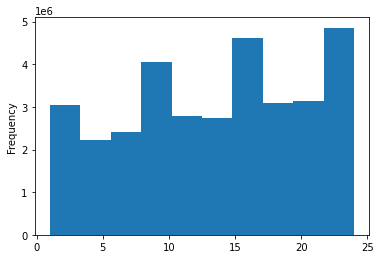

In [7]:
df_pd = data.to_pandas()
df_pd['dt'].plot.hist()

#### 各消費類別累積次數

<AxesSubplot:ylabel='Frequency'>

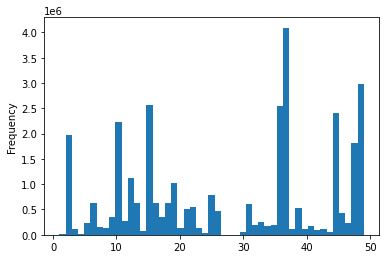

In [8]:
df_pd.loc[df_pd['shop_tag'] == 'other', 'shop_tag'] = '49' 
df_pd['shop_tag'].astype(int).plot.hist(bins=49)

需預測的類別共16種，2,6,10,12,13,15,18,19,21,22,25,26,36,37,39,48

##### txt_cnt 消費次數
36>37>10>...>4>28>29
##### txn_amt 消費金額（經過神秘轉換)
34>16>28>...>4>27>29


### 各欄位總和排序

In [9]:
df_pd.groupby(['shop_tag']).sum().rank()

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,...,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,age,primary_card
shop_tag,,,,,,,,,,,,,,,,,,,,,
1,5.0,5.0,5.0,4.0,10.0,6.0,17.0,3.0,10.0,6.0,...,7.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0
10,44.0,44.0,47.0,44.0,25.0,48.0,47.0,49.0,17.0,49.0,...,45.0,44.0,44.0,44.0,44.0,44.0,44.0,39.0,44.0,44.0
11,26.0,26.0,24.0,29.0,30.0,21.0,16.0,38.0,31.0,22.0,...,25.0,26.0,26.0,26.0,26.0,26.0,26.0,32.5,26.0,26.0
12,41.0,41.0,39.0,34.0,35.0,41.0,33.0,32.0,36.0,45.0,...,40.0,41.0,41.0,41.0,41.0,41.0,41.0,31.0,41.0,41.0
13,38.0,35.0,41.0,26.0,15.0,44.0,21.0,48.0,9.0,41.0,...,33.0,38.0,35.0,36.0,35.0,34.0,36.0,14.0,30.0,34.0
14,9.0,9.0,8.0,6.0,16.0,12.0,23.0,14.0,16.0,12.0,...,8.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,9.0,9.0
15,46.0,47.0,46.0,40.0,47.0,45.0,48.0,45.0,47.0,44.0,...,44.0,46.0,47.0,47.0,47.0,47.0,47.0,48.5,47.0,46.0
16,34.0,36.0,36.0,48.0,40.0,30.0,14.0,24.0,39.0,31.0,...,37.0,34.0,38.0,35.0,36.0,36.0,35.0,18.0,38.0,38.0
17,27.0,27.0,26.0,27.0,26.0,36.0,3.0,3.0,26.0,39.0,...,29.0,27.0,28.0,27.0,27.0,28.0,27.0,10.0,28.0,28.0


### 各欄位總和原始資料

In [10]:
df_pd.groupby(['shop_tag']).sum()

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,...,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,age,primary_card
shop_tag,,,,,,,,,,,,,,,,,,,,,
1,248245.0,2.131492e+11,30779.0,4.368763e+08,29662.0,321.0,796.0,0.0,20253.56,229.02,...,4610.95,31513.0,87275.0,194803.0,20800.0,716597.0,614884.0,2.075900e+09,81515.0,20230
10,30726878.0,2.289992e+13,6904302.0,5.478357e+20,156981.0,3322018.0,73640.0,3351663.0,62173.80,1379051.36,...,236396.03,3543229.0,8009751.0,22524794.0,2238487.0,70867309.0,65960535.0,1.272157e+155,7623732.0,2060845
11,3735098.0,2.874820e+12,351167.0,5.171064e+09,241662.0,86907.0,716.0,21882.0,204894.60,67718.56,...,29328.49,425926.0,1004482.0,2852414.0,280977.0,9156126.0,8266702.0,1.824741e+143,1020973.0,258074
12,15207507.0,1.159167e+13,1546614.0,1.012597e+10,579334.0,949502.0,6351.0,11427.0,423751.79,694290.49,...,133190.70,1733705.0,4228616.0,11233935.0,1132658.0,37735944.0,33301274.0,7.031358e+132,4088309.0,1047004
13,10197849.0,6.414902e+12,3225938.0,4.742145e+09,84584.0,1957478.0,1224.0,1182652.0,19830.07,379800.48,...,47015.69,1069437.0,2222579.0,6387934.0,627378.0,18689320.0,18514035.0,2.069421e+69,1802863.0,565815
14,1023706.0,7.530056e+11,105413.0,6.107238e+08,86926.0,16767.0,1397.0,323.0,60887.14,11278.57,...,4913.73,112365.0,259825.0,743202.0,73673.0,2201350.0,2159019.0,2.068155e+44,266295.0,67488
15,35389851.0,2.637582e+13,6901123.0,2.261272e+10,4592131.0,1991452.0,92529.0,225011.0,2030730.17,461409.53,...,227015.01,3954240.0,9080885.0,26550910.0,2579584.0,83964213.0,75811998.0,6.309748e+217,9124006.0,2342097
16,8120821.0,6.447360e+12,1112630.0,1.202447e+67,962948.0,147300.0,507.0,1875.0,535774.17,91230.53,...,70430.28,906997.0,2405559.0,6151978.0,629327.0,19781035.0,18498603.0,1.898702e+74,2420732.0,593505
17,4438340.0,3.544718e+12,448892.0,4.989182e+09,180763.0,268129.0,0.0,0.0,136928.47,208885.58,...,35535.49,493484.0,1272581.0,3445325.0,346059.0,11048520.0,10172956.0,4.242817e+51,1338575.0,321587


### transaction 次數加總
各消費類別消費次數排名 <br>
37>49>15>36>45>...>24>1>4>27>28>29

In [11]:
df_pd.groupby(['shop_tag']).count()
# df_pd.groupby(['shop_tag']).count().rank()

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,...,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
shop_tag,,,,,,,,,,,,,,,,,,,,,
1,20800,20800,20800,20800,20800,20800,20800,20800,20800,20800,...,20800,20800,20800,20800,20800,20800,20361,20557,20557,20800
10,2234101,2234101,2234101,2234101,2234101,2234101,2234101,2234101,2234101,2234101,...,2234100,2234100,2234084,2234100,2234100,2234100,2123311,2204778,2204778,2234101
11,280455,280455,280455,280455,280455,280455,280455,280455,280455,280455,...,280455,280455,280453,280455,280455,280455,265729,275573,275573,280455
12,1130825,1130825,1130825,1130825,1130825,1130825,1130825,1130825,1130825,1130825,...,1130825,1130825,1130807,1130825,1130825,1130825,1077634,1115450,1115450,1130825
13,625801,625801,625801,625801,625801,625801,625801,625801,625801,625801,...,625801,625801,625791,625801,625801,625801,592339,618804,618804,625801
14,73457,73457,73457,73457,73457,73457,73457,73457,73457,73457,...,73457,73456,73457,73457,73457,73457,69360,72153,72153,73457
15,2573145,2573145,2573145,2573145,2573145,2573145,2573145,2573145,2573145,2573145,...,2573144,2573142,2573110,2573144,2573144,2573144,2426900,2539480,2539480,2573145
16,628987,628987,628987,628987,628987,628987,628987,628987,628987,628987,...,628987,628987,628969,628987,628987,628987,599527,620847,620847,628987
17,345814,345814,345814,345814,345814,345814,345814,345814,345814,345814,...,345813,345813,345811,345813,345813,345813,327622,340908,340908,345814


In [12]:
df_cor = df_pd.corr()

In [13]:
df_pd.corrwith(df_pd['txn_amt'])

dt                         -0.000271
chid                       -0.000211
txn_cnt                    -0.000067
txn_amt                     1.000000
domestic_offline_cnt       -0.000031
domestic_online_cnt        -0.000049
overseas_offline_cnt       -0.000011
overseas_online_cnt        -0.000023
domestic_offline_amt_pct    0.000133
domestic_online_amt_pct    -0.000115
overseas_offline_amt_pct   -0.000017
overseas_online_amt_pct    -0.000045
card_1_txn_cnt             -0.000040
card_2_txn_cnt             -0.000047
card_3_txn_cnt              0.000250
card_4_txn_cnt             -0.000046
card_5_txn_cnt             -0.000018
card_6_txn_cnt             -0.000035
card_7_txn_cnt             -0.000014
card_8_txn_cnt             -0.000019
card_9_txn_cnt             -0.000012
card_10_txn_cnt            -0.000020
card_11_txn_cnt            -0.000013
card_12_txn_cnt            -0.000013
card_13_txn_cnt            -0.000007
card_14_txn_cnt            -0.000007
card_other_txn_cnt         -0.000035
c

In [14]:
df_cor

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,...,card_other_txn_amt_pct,masts,educd,trdtp,naty,poscd,cuorg,slam,age,primary_card
dt,1.000000,0.000120,0.033101,-0.000271,-0.031493,0.057762,-0.046653,0.014372,-0.106912,0.117870,...,-0.023856,0.039579,-0.009597,-0.011061,0.004566,-0.025085,0.013319,-0.0,-0.082847,0.003468
chid,0.000120,1.000000,0.000647,-0.000211,0.000303,0.000401,0.000017,0.000388,-0.000080,0.000070,...,0.001077,0.000760,0.003231,0.000837,0.001574,-0.002311,-0.000066,-0.0,0.000057,-0.001237
txn_cnt,0.033101,0.000647,1.000000,-0.000067,0.414946,0.767663,0.054297,0.349827,-0.122757,0.107043,...,-0.025686,0.032828,-0.020034,-0.009114,0.002892,-0.016550,0.001852,-0.0,-0.049778,0.002460
txn_amt,-0.000271,-0.000211,-0.000067,0.000000,-0.000031,-0.000049,-0.000011,-0.000023,0.000133,-0.000115,...,-0.000060,-0.000183,0.000339,-0.000301,-0.000008,-0.000119,0.000027,NaN,0.000353,0.000053
domestic_offline_cnt,-0.031493,0.000303,0.414946,-0.000031,1.000000,-0.111259,-0.029346,-0.072228,0.427817,-0.362618,...,0.025247,-0.060720,0.024639,0.009090,0.003902,0.028844,-0.004316,-0.0,0.101479,-0.005226
domestic_online_cnt,0.057762,0.000401,0.767663,-0.000049,-0.111259,1.000000,-0.012807,-0.002409,-0.337794,0.392515,...,-0.048009,0.059263,-0.040485,-0.016244,-0.001308,-0.038586,0.004266,0.0,-0.099422,0.012362
overseas_offline_cnt,-0.046653,0.000017,0.054297,-0.000011,-0.029346,-0.012807,1.000000,0.016049,-0.080654,-0.035546,...,-0.006685,0.013583,-0.002479,0.008568,0.005530,0.009690,-0.003913,-0.0,-0.015685,-0.033964
overseas_online_cnt,0.014372,0.000388,0.349827,-0.000023,-0.072228,-0.002409,0.016049,1.000000,-0.170921,-0.053736,...,0.002714,0.039299,0.001241,-0.002992,0.003766,-0.001988,0.002376,-0.0,-0.053368,-0.006304
domestic_offline_amt_pct,-0.106912,-0.000080,-0.122757,0.000133,0.427817,-0.337794,-0.080654,-0.170921,1.000000,-0.855906,...,0.064960,-0.136092,0.070096,0.020130,-0.000415,0.061715,-0.008305,-0.0,0.216817,-0.000330
domestic_online_amt_pct,0.117870,0.000070,0.107043,-0.000115,-0.362618,0.392515,-0.035546,-0.053736,-0.855906,1.000000,...,-0.070728,0.102950,-0.069524,-0.023368,-0.005804,-0.065939,0.009100,0.0,-0.175763,0.019657


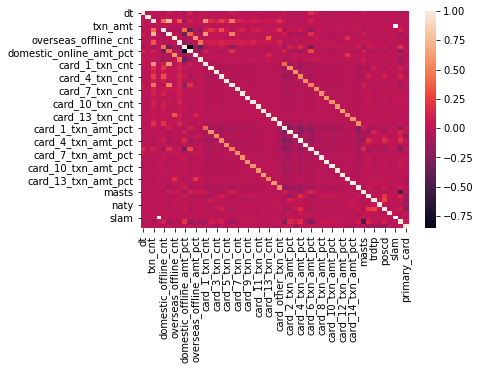

In [15]:
import seaborn as sns
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(df_cor)